In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "financial-budget"

In [2]:
# install packages for analysis
library('tidyverse')
library(dplyr)

In [3]:
# importing dataset
budget <- read.csv('/kaggle/input/financial-budget/financial budget.csv')

**preview of dataset**

In [4]:
# preview first 10 rows of dataset
head(budget, 10)

# preview last 10 rows of dataset
tail(budget, 10)

,Department..Ministry,Fund.allotted.in..crores.
,<chr>,<dbl>
1,MINISTRY OF AGRICULTURE,131531.19
2,DEPARTMENT OF ATOMIC ENERGY,18264.89
3,"MINISTRY OF AYURVEDA, YOGA",2970.30
4,MINISTRY OF CHEMICALS AND FERTILISER,80714.94
5,MINISTRY OF CIVIL AVIATION,3224.67
6,MINISTRY OF COAL,534.88
7,MINISTRY OF COMMERCE AND INDUSTRY,12768.25
8,MINISTRY OF COMMUNICATION,75265.22
9,MINISTRY OF CONSUMER AFFAIRS,256948.40


,Department..Ministry,Fund.allotted.in..crores.
,<chr>,<dbl>
48,DEPARMENT OF SPACE,13949.09
49,MINISTRY OF STATISTICS,1409.13
50,MINISTRY OF STEEL,39.25
51,MINISTRY OF TEXTILES,3631.64
52,MINISTRY OF TOURISM,2026.77
53,MINISTRY OF TRIBAL AFFAIRS,7524.87
54,MINISTRY OF WOMEN AND CHILD DEVELOPMENT,24435.00
55,MINISTRY OF YOUTH AFFAIRS AND SPORTS,2596.14
56,,NA


In [5]:
# checking the structure of the dataset

str(budget)

'data.frame':	57 obs. of  2 variables:
 $ Department..Ministry     : chr  "MINISTRY OF AGRICULTURE" "DEPARTMENT OF ATOMIC ENERGY" "MINISTRY OF AYURVEDA, YOGA" "MINISTRY OF CHEMICALS AND FERTILISER" ...
 $ Fund.allotted.in..crores.: num  131531 18265 2970 80715 3225 ...


**Preparing dataset for analysis**

In [6]:
# checking for duplicate

sum(duplicated(budget))

[1] 0

In [7]:
# checking for and missing datapoint

sum(is.na(budget))

[1] 1

In [8]:
# removing NAN rows

budget.v2 <- budget %>% drop_na()

# checking cleaned dataset

tail(budget.v2)

,Department..Ministry,Fund.allotted.in..crores.
,<chr>,<dbl>
51,MINISTRY OF TEXTILES,3631.64
52,MINISTRY OF TOURISM,2026.77
53,MINISTRY OF TRIBAL AFFAIRS,7524.87
54,MINISTRY OF WOMEN AND CHILD DEVELOPMENT,24435.00
55,MINISTRY OF YOUTH AFFAIRS AND SPORTS,2596.14
56,GRAND TOTAL,3483235.63


In [9]:
print(budget.v2)

                                         Department..Ministry
1                                     MINISTRY OF AGRICULTURE
2                                 DEPARTMENT OF ATOMIC ENERGY
3                                  MINISTRY OF AYURVEDA, YOGA
4                        MINISTRY OF CHEMICALS AND FERTILISER
5                                  MINISTRY OF CIVIL AVIATION
6                                            MINISTRY OF COAL
7                           MINISTRY OF COMMERCE AND INDUSTRY
8                                   MINISTRY OF COMMUNICATION
9                                MINISTRY OF CONSUMER AFFAIRS
10                              MINISTRY OF CORPORATE AFFAIRS
11                                        MINISTRY OF CULTURE
12                                        MINISTRY OF DEFENCE
13            MINISTRY OF DEVELOPMENT OF NORTH EASTERN REGION
14                                 MINISTRY OF EARTH SCIENCES
15                                      MINISTRY OF EDUCATION
16      

**Preparing dataset for visualization**

In [10]:
# removing Grand total row
budget.v3 <- budget.v2 %>% filter(Department..Ministry != "GRAND TOTAL")

tail(budget.v3)

,Department..Ministry,Fund.allotted.in..crores.
,<chr>,<dbl>
50,MINISTRY OF STEEL,39.25
51,MINISTRY OF TEXTILES,3631.64
52,MINISTRY OF TOURISM,2026.77
53,MINISTRY OF TRIBAL AFFAIRS,7524.87
54,MINISTRY OF WOMEN AND CHILD DEVELOPMENT,24435.00
55,MINISTRY OF YOUTH AFFAIRS AND SPORTS,2596.14


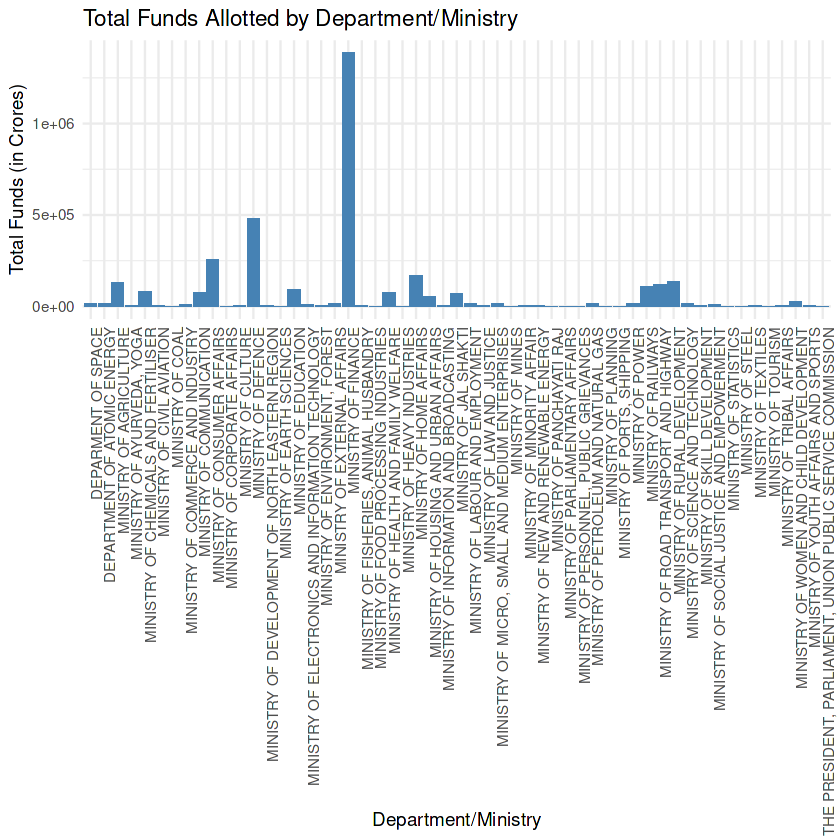

In [11]:
ggplot(data = budget.v3, aes(x = Department..Ministry, y = Fund.allotted.in..crores.)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Total Funds Allotted by Department/Ministry", x = "Department/Ministry", y = "Total Funds (in Crores)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

Form the chart, we can see that the Finance Department gets the most share from the total goverment allocated funds.